In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [2]:
plt.style.use('ggplot')
plt.style.use('seaborn-bright')

In [3]:
bb_usage_info = pd.read_csv("data/BB-Usage-Information.csv")  

bb_usage_info

,Event_Source,Event_Source.hash,Upload,Download,Duration,year-month,RTOM_CODE,LOCATION_CODE,MSAN,EQUP_ID,EQUP_INDEX,PSTN,PSTN.hash
0,VA2053035,6ff8125723953fdecaa253d2cb98b8fa,2479835042,17257396464,2505813,201910,R-VA,VA-NKM-NODE,MSAG5200-ISL,48196,1,0242053035,9231c080ea1108c7eeede0f449becb59
1,BG2286138,93ace21ebf00ad04343ff61293cec667,1864315334,8461159743,1326514,201910,R-RN,BG-NODE,MSAG5200,43139,1,0452286138,7e3969e2fb0fa148d817d3569b3eab3f
2,BZ2270133,2ada0ac0b4bafccb83447afd2e003804,413588193,4289102246,96033,201910,R-MRG,BZ-NODE,MSAG5200-ISL,43588,1,0552270133,f1415c386cab3355a5356c556fe9d0e1
3,IDH2073131,6c3134cf9691e170e9d1c011b0f19fdf,1012518853,14796542338,2681718,201910,R-KON,IDH-KGW-NODE,MSAG5200-ISL,619449,1,0112073131,517b461d5b8e09f1c3547218cc2e4947
4,MT2050369,b7e298db3ba9498507c6c971b88ab990,926361088,20905123491,1666741,201910,R-MT,MT-AVR-NODE,MSAG5200-ISL,46716,1,0662050369,7fa3296ae71b6d2bb2ff46f97218940d
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16785,KI2911444,64c4801b8e54f160cb55485ea4749b53,23669941591,169473000000,2650134,202005,R-KI,KI-NODE,C300M,1066816,4,0112911444,0b9c67d21fa2883687695482de31d631
16786,IM2287049,4a9c1740f2139c820db9e20f67488ff1,1166127281,14184721881,631664,202008,R-GL,IM-NODE,UA5000(IPMB),39153,1,0912287049,46960b77dad950ddae76dd53bd7848cd
16787,MH2227363,31a7c210ea5cf7d79fc4ffca84c70613,618513100,8530589182,353262,202005,R-MH,MH-POL-NODE,MSAG5200-ISL,49145,1,0412227363,4dd51155385e44fdf8d82be5630963f8
16788,MT2050369,b7e298db3ba9498507c6c971b88ab990,1454432998,27510692517,1661209,202005,R-MT,MT-AVR-NODE,MSAG5200-ISL,46716,1,0662050369,7fa3296ae71b6d2bb2ff46f97218940d


In [4]:
# Handle null values
# Drop unnecessary cols
# Pivot by monthYear
# Usage rating Upload/Downlad/Duration - bucketizing/ add rating cols
# location grouping/bucketizing (consider 4 location cols)
# User profile dim table
# visualize and analyze data

In [5]:
bb_usage_info = bb_usage_info.drop_duplicates(["PSTN.hash","year-month"], keep="last")

bb_usage_info.shape

(13043, 13)

In [6]:
bb_usage_info = bb_usage_info.drop(['Event_Source','PSTN'], axis=1)

In [7]:
bb_usage_info.head()

,Event_Source.hash,Upload,Download,Duration,year-month,RTOM_CODE,LOCATION_CODE,MSAN,EQUP_ID,EQUP_INDEX,PSTN.hash
0,6ff8125723953fdecaa253d2cb98b8fa,2479835042,17257396464,2505813,201910,R-VA,VA-NKM-NODE,MSAG5200-ISL,48196,1,9231c080ea1108c7eeede0f449becb59
1,93ace21ebf00ad04343ff61293cec667,1864315334,8461159743,1326514,201910,R-RN,BG-NODE,MSAG5200,43139,1,7e3969e2fb0fa148d817d3569b3eab3f
2,2ada0ac0b4bafccb83447afd2e003804,413588193,4289102246,96033,201910,R-MRG,BZ-NODE,MSAG5200-ISL,43588,1,f1415c386cab3355a5356c556fe9d0e1
3,6c3134cf9691e170e9d1c011b0f19fdf,1012518853,14796542338,2681718,201910,R-KON,IDH-KGW-NODE,MSAG5200-ISL,619449,1,517b461d5b8e09f1c3547218cc2e4947
4,b7e298db3ba9498507c6c971b88ab990,926361088,20905123491,1666741,201910,R-MT,MT-AVR-NODE,MSAG5200-ISL,46716,1,7fa3296ae71b6d2bb2ff46f97218940d


In [8]:
bb_usage_info['Duration'].fillna(0)
bb_usage_info['Upload'].fillna(0)
bb_usage_info['Download'].fillna(0)

0         17257396464
1          8461159743
2          4289102246
3         14796542338
4         20905123491
             ...     
16785    169473000000
16786     14184721881
16787      8530589182
16788     27510692517
16789     26455546135
Name: Download, Length: 13043, dtype: int64

In [9]:
bb_usage_info.isnull().sum(axis=0)

Event_Source.hash    0
Upload               0
Download             0
Duration             0
year-month           0
RTOM_CODE            0
LOCATION_CODE        0
MSAN                 0
EQUP_ID              0
EQUP_INDEX           0
PSTN.hash            0
dtype: int64

# Phase 1

## Usage Ranking

- 1. Pivot by year-month
- 2. Bin by Upload/Download/Duration
- 3. Usage Rank
- 4. Labling usage

In [10]:
bb_usage = bb_usage_info[['PSTN.hash','Upload','Download','Duration','year-month']]
bb_usage['Usage'] = bb_usage.loc[:,['Upload','Download']].sum(axis=1)
bb_usage = bb_usage.drop(['Upload','Download'], axis=1)
bb_usage


<ipython-input-10-b69c0b867eab>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bb_usage['Usage'] = bb_usage.loc[:,['Upload','Download']].sum(axis=1)


,PSTN.hash,Duration,year-month,Usage
0,9231c080ea1108c7eeede0f449becb59,2505813,201910,19737231506
1,7e3969e2fb0fa148d817d3569b3eab3f,1326514,201910,10325475077
2,f1415c386cab3355a5356c556fe9d0e1,96033,201910,4702690439
3,517b461d5b8e09f1c3547218cc2e4947,2681718,201910,15809061191
4,7fa3296ae71b6d2bb2ff46f97218940d,1666741,201910,21831484579
...,...,...,...,...
16785,0b9c67d21fa2883687695482de31d631,2650134,202005,193142941591
16786,46960b77dad950ddae76dd53bd7848cd,631664,202008,15350849162
16787,4dd51155385e44fdf8d82be5630963f8,353262,202005,9149102282
16788,7fa3296ae71b6d2bb2ff46f97218940d,1661209,202005,28965125515


### BB Usage Trend Analysis

In [12]:
bb_usage_for_plot = bb_usage
bb_usage_for_plot["year-month"] = bb_usage_for_plot["year-month"].astype("category")

In [14]:
bb_usage_for_plot.groupby("year-month").sum()

,Duration,Usage
year-month,,
201908,1322771923,18396414783830
201910,1541763633,20949921285543
201911,1527486627,20038661960520
201912,1630236679,21989694763296
202001,1701369407,23685659012437
202002,1573660302,24056307886418
202003,1736761784,25649035120108
202004,1716944851,29113019920853
202005,1725851259,28452389700960


Text(0.5, 0.98, 'Broadband Duration (in hours) with Time')

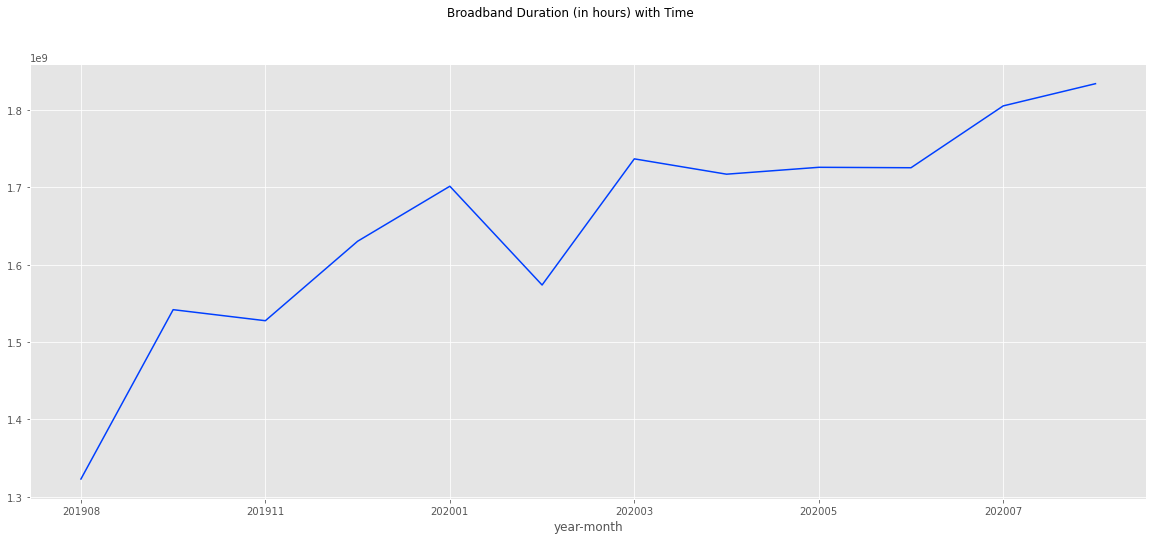

In [16]:
plt.figure(figsize=(20,8))
bb_usage_for_plot.groupby("year-month").sum()["Duration"].plot()
plt.suptitle("Broadband Duration (in hours) with Time")

Text(0.5, 0.98, 'BroadBand Usage(in Bytes) with Time')

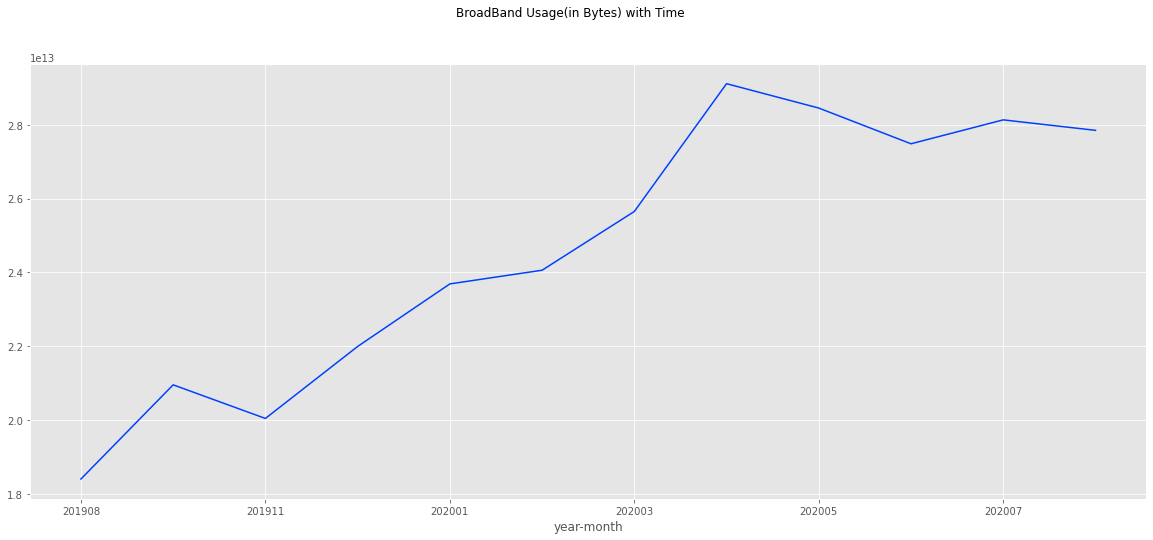

In [17]:
plt.figure(figsize=(20,8))
bb_usage_for_plot.groupby("year-month").sum()["Usage"].plot()
plt.suptitle("BroadBand Usage(in Bytes) with Time")

In [33]:
pivot_bb_usage_info = pd.pivot_table(bb_usage,index=['PSTN.hash'],columns=['year-month'], aggfunc=np.sum, fill_value=0)
pivot_bb_usage_info

Duration                                      \
year-month                         201908   201910   201911   201912   202001   
PSTN.hash                                                                       
00567a4a3c474aca1ce5cd6570648932  2277937  1256652   795222  1417310  2176277   
00724ae2470df1ed0fe919800d02517d        0        0        0        0        0   
00a8c3e3baed0557c31ab9b68a086ed2   699711  1153572   374914   511928  1194567   
00cc5a820586ce291c0fa4c2a99a4816        0        0        0        0   157239   
00d1f690ec4af27702febbd0db6942c2   713219   663171   558688   377493   570854   
...                                   ...      ...      ...      ...      ...   
feca6cdb74a4a95dec4fe88f3fb2f938        0        0        0        0        0   
ff1093d5ef61bf46f8c88e9b7614e311   681240   791191   872112   938131   666153   
ff45fdfb4b6dac191aba17a281181d39  2292467  2332487  2276132  2523725  2548082   
ffb2ec238eba276f65157693ed329c7f        0        0        0   140358  2056665   
ffd697d66cc01c8897ce3e37d693673a  1405744        0        0        0        0   

                                                                               \
year-month                         202002   202003   202004   202005   202006   
PSTN.hash                                                                       
00567a4a3c474aca1ce5cd6570648932  2212790  2030474  1725246  2133617  1777555   
00724ae2470df1ed0fe919800d02517d        0        0        0        0        0   
00a8c3e3baed0557c31ab9b68a086ed2   493510   431098   552825   421133  1049049   
00cc5a820586ce291c0fa4c2a99a4816   548360        0        0  1119319   966783   
00d1f690ec4af27702febbd0db6942c2   545675   697625   520233   350390   222968   
...                                   ...      ...      ...      ...      ...   
feca6cdb74a4a95dec4fe88f3fb2f938        0        0        0        0        0   
ff1093d5ef61bf46f8c88e9b7614e311   693108  1223891  1615199  1541898   813031   
ff45fdfb4b6dac191aba17a281181d39  2422885  2645146  2558089  2545852  2542633   
ffb2ec238eba276f65157693ed329c7f  1820231  2413915  2272529  2597092  2555086   
ffd697d66cc01c8897ce3e37d693673a        0        0        0        0        0   

                                  ...        Usage                            \
year-month                        ...       201911       201912       202001   
PSTN.hash                         ...                                          
00567a4a3c474aca1ce5cd6570648932  ...  11764247072  27618734644  33279185555   
00724ae2470df1ed0fe919800d02517d  ...            0            0            0   
00a8c3e3baed0557c31ab9b68a086ed2  ...  13435042644  10508792092  17492553338   
00cc5a820586ce291c0fa4c2a99a4816  ...            0            0      5498326   
00d1f690ec4af27702febbd0db6942c2  ...   7795652629   7632107196   8961346005   
...                               ...          ...          ...          ...   
feca6cdb74a4a95dec4fe88f3fb2f938  ...            0            0            0   
ff1093d5ef61bf46f8c88e9b7614e311  ...  10917038375  15030006772  10187461833   
ff45fdfb4b6dac191aba17a281181d39  ...  21145367276  24093109565  21815269999   
ffb2ec238eba276f65157693ed329c7f  ...            0   1329073213  57067166125   
ffd697d66cc01c8897ce3e37d693673a  ...            0            0            0   

                                                                         \
year-month                             202002       202003       202004   
PSTN.hash                                                                 
00567a4a3c474aca1ce5cd6570648932  36946597062  28860391201  37042221978   
00724ae2470df1ed0fe919800d02517d            0            0            0   
00a8c3e3baed0557c31ab9b68a086ed2  12583099729  15043376719  12242977343   
00cc5a820586ce291c0fa4c2a99a4816    466553446            0            0   
00d1f690ec4af27702febbd0db6942c2   8920192587   9256717275   9942677985   
...                                       

In [34]:
pivot_bb_usage_info.columns

MultiIndex([('Duration', 201908),
            ('Duration', 201910),
            ('Duration', 201911),
            ('Duration', 201912),
            ('Duration', 202001),
            ('Duration', 202002),
            ('Duration', 202003),
            ('Duration', 202004),
            ('Duration', 202005),
            ('Duration', 202006),
            ('Duration', 202007),
            ('Duration', 202008),
            (   'Usage', 201908),
            (   'Usage', 201910),
            (   'Usage', 201911),
            (   'Usage', 201912),
            (   'Usage', 202001),
            (   'Usage', 202002),
            (   'Usage', 202003),
            (   'Usage', 202004),
            (   'Usage', 202005),
            (   'Usage', 202006),
            (   'Usage', 202007),
            (   'Usage', 202008)],
           names=[None, 'year-month'])

In [35]:
bb_usage.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,Duration,year-month,Usage
count,13043.00000,13043.00000,13043.00000
mean,1521226.50564,201974.09438,22678527038.04807
std,870908.53424,44.13513,28481239994.13892
min,120.00000,201908.00000,0.00000
25%,739867.00000,201912.00000,6834388399.50000
50%,1518326.00000,202003.00000,13811012030.00000
75%,2427392.00000,202006.00000,27456020350.00000
max,2709612.00000,202008.00000,537118249202.00000


In [36]:
# binning usage
usage_bins = [0, 7057561283.25, 14188526279.5,28226707481.75, 537118249202.0]
for col in pivot_bb_usage_info['Usage'].columns:
    pivot_bb_usage_info['Usage'][col] = np.searchsorted(usage_bins, pivot_bb_usage_info['Usage'][col].values)
pivot_bb_usage_info['Usage']

<ipython-input-36-11a9924446b9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivot_bb_usage_info['Usage'][col] = np.searchsorted(usage_bins, pivot_bb_usage_info['Usage'][col].values)


year-month,201908,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008
PSTN.hash,,,,,,,,,,,,
00567a4a3c474aca1ce5cd6570648932,4,3,2,3,4,4,4,4,4,3,4,3
00724ae2470df1ed0fe919800d02517d,0,0,0,0,0,0,0,0,0,0,0,2
00a8c3e3baed0557c31ab9b68a086ed2,2,2,2,2,3,2,3,2,2,2,2,2
00cc5a820586ce291c0fa4c2a99a4816,0,0,0,0,1,1,0,0,1,1,1,2
00d1f690ec4af27702febbd0db6942c2,2,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
feca6cdb74a4a95dec4fe88f3fb2f938,0,0,0,0,0,0,0,0,0,0,2,2
ff1093d5ef61bf46f8c88e9b7614e311,2,2,2,3,2,3,4,4,4,2,3,2
ff45fdfb4b6dac191aba17a281181d39,3,4,3,3,3,4,3,1,1,4,3,2


In [37]:
# binning duration
duration_bins = [0, 745381.25, 1522064.0, 2438034.0,2709612.0]
for col in pivot_bb_usage_info['Duration'].columns:
    pivot_bb_usage_info['Duration'][col] = np.searchsorted(duration_bins, pivot_bb_usage_info['Duration'][col].values)
pivot_bb_usage_info['Duration']

<ipython-input-37-e9ec739a43e9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivot_bb_usage_info['Duration'][col] = np.searchsorted(duration_bins, pivot_bb_usage_info['Duration'][col].values)


year-month,201908,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008
PSTN.hash,,,,,,,,,,,,
00567a4a3c474aca1ce5cd6570648932,3,2,2,2,3,3,3,3,3,3,3,2
00724ae2470df1ed0fe919800d02517d,0,0,0,0,0,0,0,0,0,0,0,3
00a8c3e3baed0557c31ab9b68a086ed2,1,2,1,1,2,1,1,1,1,2,1,1
00cc5a820586ce291c0fa4c2a99a4816,0,0,0,0,1,1,0,0,2,2,2,3
00d1f690ec4af27702febbd0db6942c2,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
feca6cdb74a4a95dec4fe88f3fb2f938,0,0,0,0,0,0,0,0,0,0,2,2
ff1093d5ef61bf46f8c88e9b7614e311,1,2,2,2,1,1,2,3,3,2,1,1
ff45fdfb4b6dac191aba17a281181d39,3,3,3,4,4,3,4,4,4,4,3,3


In [38]:
pivot_bb_usage_info

Duration                                     \
year-month                         201908 201910 201911 201912 202001 202002   
PSTN.hash                                                                      
00567a4a3c474aca1ce5cd6570648932        3      2      2      2      3      3   
00724ae2470df1ed0fe919800d02517d        0      0      0      0      0      0   
00a8c3e3baed0557c31ab9b68a086ed2        1      2      1      1      2      1   
00cc5a820586ce291c0fa4c2a99a4816        0      0      0      0      1      1   
00d1f690ec4af27702febbd0db6942c2        1      1      1      1      1      1   
...                                   ...    ...    ...    ...    ...    ...   
feca6cdb74a4a95dec4fe88f3fb2f938        0      0      0      0      0      0   
ff1093d5ef61bf46f8c88e9b7614e311        1      2      2      2      1      1   
ff45fdfb4b6dac191aba17a281181d39        3      3      3      4      4      3   
ffb2ec238eba276f65157693ed329c7f        0      0      0      1      3      3   
ffd697d66cc01c8897ce3e37d693673a        2      0      0      0      0      0   

                                                              ...  Usage  \
year-month                       202003 202004 202005 202006  ... 201911   
PSTN.hash                                                     ...          
00567a4a3c474aca1ce5cd6570648932      3      3      3      3  ...      2   
00724ae2470df1ed0fe919800d02517d      0      0      0      0  ...      0   
00a8c3e3baed0557c31ab9b68a086ed2      1      1      1      2  ...      2   
00cc5a820586ce291c0fa4c2a99a4816      0      0      2      2  ...      0   
00d1f690ec4af27702febbd0db6942c2      1      1      1      1  ...      2   
...                                 ...    ...    ...    ...  ...    ...   
feca6cdb74a4a95dec4fe88f3fb2f938      0      0      0      0  ...      0   
ff1093d5ef61bf46f8c88e9b7614e311      2      3      3      2  ...      2   
ff45fdfb4b6dac191aba17a281181d39      4      4      4      4  ...      3   
ffb2ec238eba276f65157693ed329c7f      3      3      4      4  ...      0   
ffd697d66cc01c8897ce3e37d693673a      0      0      0      0  ...      0   

                                                                            \
year-month                       201912 202001 202002 202003 202004 202005   
PSTN.hash                                                                    
00567a4a3c474aca1ce5cd6570648932      3      4      4      4      4      4   
00724ae2470df1ed0fe919800d02517d      0      0      0      0      0      0   
00a8c3e3baed0557c31ab9b68a086ed2      2      3      2      3      2      2   
00cc5a820586ce291c0fa4c2a99a4816      0      1      1      0      0      1   
00d1f690ec4af27702febbd0db6942c2      2      2      2      2      2      2   
...                                 ...    ...    ...    ...    ...    ...   
feca6cdb74a4a95dec4fe88f3fb2f938      0      0      0      0      0      0   
ff1093d5ef61bf46f8c88e9b7614e311      3      2      3      4      4      4   
ff45fdfb4b6dac191aba17a281181d39      3      3      4      3      1      1   
ffb2ec238eba276f65157693ed329c7f      1      4      4      4      4      4   
ffd697d66cc01c8897ce3e37d693673a      0      0      0      0      0      0   

                                                       
year-month                       202006 202007 202008  
PSTN.hash                                              
00567a4a3c474aca1ce5cd6570648932      3      4      3  
00724ae2470df1ed0fe919800d02517d      0      0      2  
00a8c3e3baed0557c31ab9b68a086ed2      2      2      2  
00cc5a820586ce291c0fa4c2a99a4816      1      1      2  
00d1f690ec4af27702febbd0db6942c2      2      2      2  
...                                 ...    ...    ...  
feca6cdb74a4a95dec4fe88f3fb2f938      0      2      2  
ff1093d5ef61bf46f8c88e9b7614e311      2      3      2  
ff45fdfb4b6dac191aba17a281181d39      4      3      2  
ffb2ec238eba276f65157693ed329c7f      4      4      3  
ffd697d66cc01c8897ce3e37d6

In [39]:
year_month_list = pivot_bb_usage_info['Usage'].columns

In [40]:
# multplying bins to get usage rating
for col in year_month_list:
    pivot_bb_usage_info[col] = pivot_bb_usage_info['Usage'][col]  * pivot_bb_usage_info['Duration'][col]

### Justification
- https://www.researchgate.net/post/Can-I-combine-2-independent-variable-as-one-variable-in-a-model-Can-I-still-include-the-individual-variable-in-the-same-model-after-combing-the-two
- http://www.utstat.toronto.edu/~brunner/DataAnalysisText/Interactions.pdf

### More advanced methods
- Dimension reduction approaches?

## ToDO
- find a different approach other than product

### Usage ratings for year-month

In [41]:
pivot_bb_usage_info = pivot_bb_usage_info.drop(['Usage','Duration'], axis=1)
pivot_bb_usage_info

,201908,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008
year-month,,,,,,,,,,,,
PSTN.hash,,,,,,,,,,,,
00567a4a3c474aca1ce5cd6570648932,12,6,4,6,12,12,12,12,12,9,12,6
00724ae2470df1ed0fe919800d02517d,0,0,0,0,0,0,0,0,0,0,0,6
00a8c3e3baed0557c31ab9b68a086ed2,2,4,2,2,6,2,3,2,2,4,2,2
00cc5a820586ce291c0fa4c2a99a4816,0,0,0,0,1,1,0,0,2,2,2,6
00d1f690ec4af27702febbd0db6942c2,2,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
feca6cdb74a4a95dec4fe88f3fb2f938,0,0,0,0,0,0,0,0,0,0,4,4
ff1093d5ef61bf46f8c88e9b7614e311,2,4,4,6,2,3,8,12,12,4,3,2


In [42]:
# scaling usage rating
scaler = MinMaxScaler()
for col in year_month_list:
    pivot_bb_usage_info[col] = scaler.fit_transform(pivot_bb_usage_info[col].values.reshape(-1,1))

<AxesSubplot:xlabel='None-year-month', ylabel='PSTN.hash'>

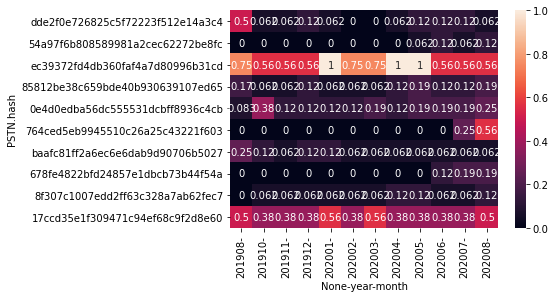

In [43]:
sns.heatmap(pivot_bb_usage_info[year_month_list].sample(n=10), annot=True)

<AxesSubplot:>

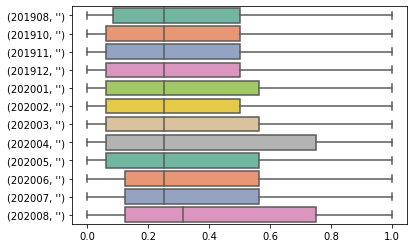

In [44]:
ax = sns.boxplot(data=pivot_bb_usage_info[[int(x) for x in year_month_list]], orient="h", palette="Set2")
ax

<AxesSubplot:ylabel='Density'>

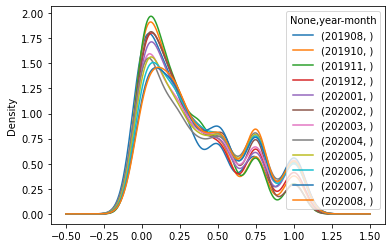

In [45]:
pivot_bb_usage_info[[int(x) for x in year_month_list]].plot(kind = 'density')

In [46]:
pivot_bb_usage_info['Usage_Rating_Scaled'] = pivot_bb_usage_info[year_month_list].sum(axis=1)/len(year_month_list)
pivot_bb_usage_info

,201908,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008,Usage_Rating_Scaled
year-month,,,,,,,,,,,,,
PSTN.hash,,,,,,,,,,,,,
00567a4a3c474aca1ce5cd6570648932,1.000000,0.375,0.2500,0.3750,0.7500,0.7500,0.7500,0.750,0.750,0.5625,0.7500,0.375,0.619792
00724ae2470df1ed0fe919800d02517d,0.000000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.0000,0.375,0.031250
00a8c3e3baed0557c31ab9b68a086ed2,0.166667,0.250,0.1250,0.1250,0.3750,0.1250,0.1875,0.125,0.125,0.2500,0.1250,0.125,0.175347
00cc5a820586ce291c0fa4c2a99a4816,0.000000,0.000,0.0000,0.0000,0.0625,0.0625,0.0000,0.000,0.125,0.1250,0.1250,0.375,0.072917
00d1f690ec4af27702febbd0db6942c2,0.166667,0.125,0.1250,0.1250,0.1250,0.1250,0.1250,0.125,0.125,0.1250,0.1250,0.125,0.128472
...,...,...,...,...,...,...,...,...,...,...,...,...,...
feca6cdb74a4a95dec4fe88f3fb2f938,0.000000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.2500,0.250,0.041667
ff1093d5ef61bf46f8c88e9b7614e311,0.166667,0.250,0.2500,0.3750,0.1250,0.1875,0.5000,0.750,0.750,0.2500,0.1875,0.125,0.326389


In [47]:
pivot_bb_usage_info.describe()

,201908,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008,Usage_Rating_Scaled
year-month,,,,,,,,,,,,,
count,1306.000000,1306.000000,1306.000000,1306.000000,1306.000000,1306.000000,1306.000000,1306.000000,1306.000000,1306.000000,1306.000000,1306.000000,1306.000000
mean,0.328931,0.310825,0.299914,0.327910,0.346861,0.322741,0.363419,0.376388,0.374856,0.376627,0.390027,0.391702,0.350850
std,0.323410,0.295865,0.281419,0.303084,0.315020,0.291014,0.323282,0.328423,0.320893,0.315067,0.317071,0.315250,0.262686
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005208
25%,0.083333,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.125000,0.125000,0.125000,0.127170
50%,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.312500,0.281250
75%,0.500000,0.500000,0.500000,0.500000,0.562500,0.500000,0.562500,0.750000,0.562500,0.562500,0.562500,0.750000,0.531250
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
# labling usage bins
bins = [0, 0.33, 0.66,1]
labels = ['LOW','MEDIUM','HIGH']
pivot_bb_usage_info['Usage_Rating_Categorical'] = pd.cut(pivot_bb_usage_info['Usage_Rating_Scaled'], bins=bins, labels=labels)
pivot_bb_usage_info

,201908,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008,Usage_Rating_Scaled,Usage_Rating_Categorical
year-month,,,,,,,,,,,,,,
PSTN.hash,,,,,,,,,,,,,,
00567a4a3c474aca1ce5cd6570648932,1.000000,0.375,0.2500,0.3750,0.7500,0.7500,0.7500,0.750,0.750,0.5625,0.7500,0.375,0.619792,MEDIUM
00724ae2470df1ed0fe919800d02517d,0.000000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.0000,0.375,0.031250,LOW
00a8c3e3baed0557c31ab9b68a086ed2,0.166667,0.250,0.1250,0.1250,0.3750,0.1250,0.1875,0.125,0.125,0.2500,0.1250,0.125,0.175347,LOW
00cc5a820586ce291c0fa4c2a99a4816,0.000000,0.000,0.0000,0.0000,0.0625,0.0625,0.0000,0.000,0.125,0.1250,0.1250,0.375,0.072917,LOW
00d1f690ec4af27702febbd0db6942c2,0.166667,0.125,0.1250,0.1250,0.1250,0.1250,0.1250,0.125,0.125,0.1250,0.1250,0.125,0.128472,LOW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
feca6cdb74a4a95dec4fe88f3fb2f938,0.000000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.2500,0.250,0.041667,LOW
ff1093d5ef61bf46f8c88e9b7614e311,0.166667,0.250,0.2500,0.3750,0.1250,0.1875,0.5000,0.750,0.750,0.2500,0.1875,0.125,0.326389,LOW


In [49]:
# adding category "NO" 
pivot_bb_usage_info['Usage_Rating_Categorical'] = pivot_bb_usage_info['Usage_Rating_Categorical'].cat.add_categories("NO")
pivot_bb_usage_info.loc[pivot_bb_usage_info['Usage_Rating_Scaled'] == 0.0, 'Usage_Rating_Categorical'] = "NO"
pivot_bb_usage_info[(pivot_bb_usage_info['Usage_Rating_Scaled'] == 0.0)]

,201908,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008,Usage_Rating_Scaled,Usage_Rating_Categorical
year-month,,,,,,,,,,,,,,
PSTN.hash,,,,,,,,,,,,,,


### Fina Result: Usage Ratings

In [50]:
pivot_bb_usage_info

,201908,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008,Usage_Rating_Scaled,Usage_Rating_Categorical
year-month,,,,,,,,,,,,,,
PSTN.hash,,,,,,,,,,,,,,
00567a4a3c474aca1ce5cd6570648932,1.000000,0.375,0.2500,0.3750,0.7500,0.7500,0.7500,0.750,0.750,0.5625,0.7500,0.375,0.619792,MEDIUM
00724ae2470df1ed0fe919800d02517d,0.000000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.0000,0.375,0.031250,LOW
00a8c3e3baed0557c31ab9b68a086ed2,0.166667,0.250,0.1250,0.1250,0.3750,0.1250,0.1875,0.125,0.125,0.2500,0.1250,0.125,0.175347,LOW
00cc5a820586ce291c0fa4c2a99a4816,0.000000,0.000,0.0000,0.0000,0.0625,0.0625,0.0000,0.000,0.125,0.1250,0.1250,0.375,0.072917,LOW
00d1f690ec4af27702febbd0db6942c2,0.166667,0.125,0.1250,0.1250,0.1250,0.1250,0.1250,0.125,0.125,0.1250,0.1250,0.125,0.128472,LOW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
feca6cdb74a4a95dec4fe88f3fb2f938,0.000000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.2500,0.250,0.041667,LOW
ff1093d5ef61bf46f8c88e9b7614e311,0.166667,0.250,0.2500,0.3750,0.1250,0.1875,0.5000,0.750,0.750,0.2500,0.1875,0.125,0.326389,LOW


In [51]:
pivot_bb_usage_info.to_csv("data/user_profile/BB_Usage_Categorical.csv")

# Phase 2

## Binnig by Location 

- 1. group by location columns
- 2. Bin by location and get counts

In [52]:
# bucketing by location
bb_location_info = bb_usage_info
bb_location_info['Location_Identifier'] = bb_location_info['MSAN'].astype(str)+ bb_location_info['LOCATION_CODE'].astype(str) +bb_location_info['EQUP_ID'].astype(str) +bb_location_info['EQUP_INDEX'].astype(str)
bb_location_info

,Event_Source.hash,Upload,Download,Duration,year-month,RTOM_CODE,LOCATION_CODE,MSAN,EQUP_ID,EQUP_INDEX,PSTN.hash,Location_Identifier
0,6ff8125723953fdecaa253d2cb98b8fa,2479835042,17257396464,2505813,201910,R-VA,VA-NKM-NODE,MSAG5200-ISL,48196,1,9231c080ea1108c7eeede0f449becb59,MSAG5200-ISLVA-NKM-NODE481961
1,93ace21ebf00ad04343ff61293cec667,1864315334,8461159743,1326514,201910,R-RN,BG-NODE,MSAG5200,43139,1,7e3969e2fb0fa148d817d3569b3eab3f,MSAG5200BG-NODE431391
2,2ada0ac0b4bafccb83447afd2e003804,413588193,4289102246,96033,201910,R-MRG,BZ-NODE,MSAG5200-ISL,43588,1,f1415c386cab3355a5356c556fe9d0e1,MSAG5200-ISLBZ-NODE435881
3,6c3134cf9691e170e9d1c011b0f19fdf,1012518853,14796542338,2681718,201910,R-KON,IDH-KGW-NODE,MSAG5200-ISL,619449,1,517b461d5b8e09f1c3547218cc2e4947,MSAG5200-ISLIDH-KGW-NODE6194491
4,b7e298db3ba9498507c6c971b88ab990,926361088,20905123491,1666741,201910,R-MT,MT-AVR-NODE,MSAG5200-ISL,46716,1,7fa3296ae71b6d2bb2ff46f97218940d,MSAG5200-ISLMT-AVR-NODE467161
...,...,...,...,...,...,...,...,...,...,...,...,...
16785,64c4801b8e54f160cb55485ea4749b53,23669941591,169473000000,2650134,202005,R-KI,KI-NODE,C300M,1066816,4,0b9c67d21fa2883687695482de31d631,C300MKI-NODE10668164
16786,4a9c1740f2139c820db9e20f67488ff1,1166127281,14184721881,631664,202008,R-GL,IM-NODE,UA5000(IPMB),39153,1,46960b77dad950ddae76dd53bd7848cd,UA5000(IPMB)IM-NODE391531
16787,31a7c210ea5cf7d79fc4ffca84c70613,618513100,8530589182,353262,202005,R-MH,MH-POL-NODE,MSAG5200-ISL,49145,1,4dd51155385e44fdf8d82be5630963f8,MSAG5200-ISLMH-POL-NODE491451
16788,b7e298db3ba9498507c6c971b88ab990,1454432998,27510692517,1661209,202005,R-MT,MT-AVR-NODE,MSAG5200-ISL,46716,1,7fa3296ae71b6d2bb2ff46f97218940d,MSAG5200-ISLMT-AVR-NODE467161


In [53]:
bb_location_info = bb_location_info.drop_duplicates("PSTN.hash", keep="last")
bb_location_info.shape

(1306, 12)

In [54]:
user_location = bb_location_info[['PSTN.hash','Location_Identifier']]
user_location

,PSTN.hash,Location_Identifier
1038,603cefb461111f70653b606298757799,MSAG5200PH-AKG-NODE431631
3104,0ac56d0bbc79038c4ad883305638512f,MSAG5200-ISLMV-GDM-NODE482491
3131,03c567a2c97746f2545c0f9b8285827c,MSAG5200-ISLTBT-TLJ-NODE487241
3505,f6ec80f8701edf2f87c851996aa07ef1,MSAG5200BG-NODE431391
3655,923b8b0fdb0af84e50f1ba089c78c38d,MSAG5200PH-AKG-NODE431631
...,...,...
16785,0b9c67d21fa2883687695482de31d631,C300MKI-NODE10668164
16786,46960b77dad950ddae76dd53bd7848cd,UA5000(IPMB)IM-NODE391531
16787,4dd51155385e44fdf8d82be5630963f8,MSAG5200-ISLMH-POL-NODE491451
16788,7fa3296ae71b6d2bb2ff46f97218940d,MSAG5200-ISLMT-AVR-NODE467161


In [55]:
user_location.to_csv("data/user_profile/BB_USAGE_Locations_of_Users.csv")

In [56]:
bb_location_info["User_Count"] = 1
bb_gropued_by_locations = bb_location_info.groupby(['Location_Identifier'], axis=0,as_index=False).sum()
bb_gropued_by_locations = bb_gropued_by_locations[['Location_Identifier','User_Count']]

<ipython-input-56-28461a8251ee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bb_location_info["User_Count"] = 1


In [57]:
bb_gropued_by_locations

,Location_Identifier,User_Count
0,C300MHE-DMD-NODE15221561,3
1,C300MHT-NE-NODE8152461,10
2,C300MIDH-IDJ-NODE11065541,23
3,C300MKI-NODE10668164,25
4,C300MNW-MEE-NODE18887751,73
5,C300MPDT-NODE13379431,3
6,C300MTP-NODE8700911,9
7,C300MVH-NODE9874041,3
8,MA5603TAD-SRV-NODE10224991,2
9,MSAG5200-ISLBZ-NODE435881,44


In [58]:
bb_gropued_by_locations.to_csv("data/user_profile/BB_Users_by_location.csv")

<AxesSubplot:>

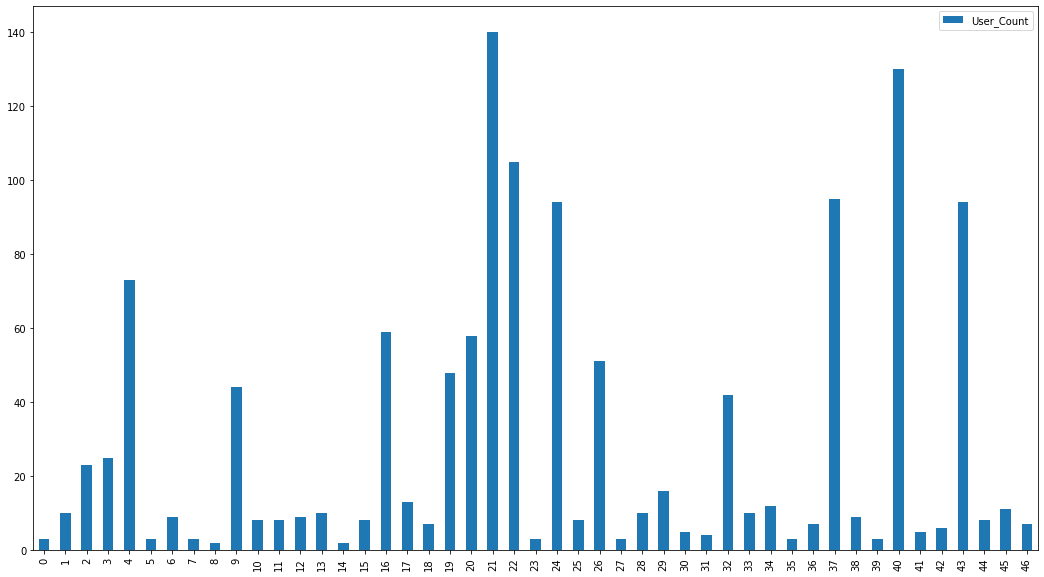

In [60]:
bb_gropued_by_locations.plot(kind="bar", figsize=(18,10),xticks=bb_gropued_by_locations.index)